In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

2024-10-27 21:55:37.639774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-27 21:55:39.219129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


For when doing GPU work

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-27 21:55:42.791618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:43.225125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:43.225182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.


IPPR CNN Model 

Import image data from dataset containing 20000 positive images and 20000 negative images with each image being 227 x 227 pixels large. Kaggle link: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('Data', image_size=(227, 227), batch_size=128)

Found 20000 files belonging to 2 classes.


2024-10-27 21:55:46.397774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:46.397885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:46.397937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:47.860720: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 21:55:47.860798: I tensorflow/compile

Shuffle the dataset before splitting the data into training, testing and validation sets.

In [4]:
shuffled_data = data.shuffle(buffer_size=100, reshuffle_each_iteration=False)

Splitting the dataset into training, testining and validation sets.

In [5]:
training_split_size = int(len(data)*.7)
testing_split_size = int(len(data)*.15)
validation_split_size = int(len(data)*.15)

In [6]:
training_set = shuffled_data.take(training_split_size)
testing_set = shuffled_data.skip(training_split_size).take(testing_split_size)
validation_set = shuffled_data.skip(training_split_size+testing_split_size).take(validation_split_size)

Model Building

In [26]:
model = Sequential()

model.add(tf.keras.Input(shape=(227,227,3)))
model.add(Conv2D(32, 9, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 7, strides = 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))




Compiling Model

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 219, 219, 32)      7808      
                                                                 
 conv2d_9 (Conv2D)           (None, 213, 213, 16)      25104     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 106, 106, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 16)      272       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 16)      272       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 16)        0         
 g2D)                                                 

In [29]:
hist = model.fit(training_set, epochs = 25, validation_data = validation_set)

Epoch 1/25


2024-10-27 21:55:00.807403: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 28 of 100
2024-10-27 21:55:09.312800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] Filling up shuffle buffer (this may take a while): 57 of 100


: 

Plotting training and validation loss

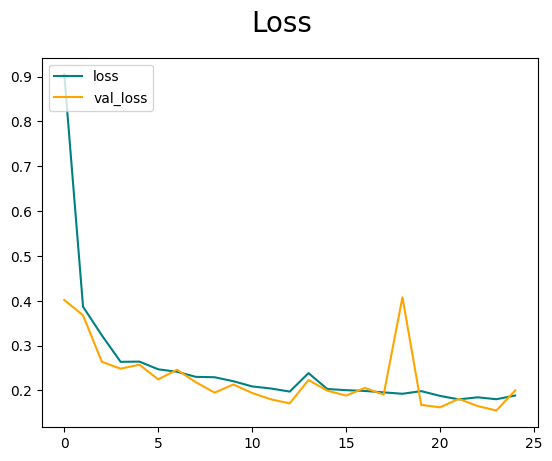

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting training and validation accuracy

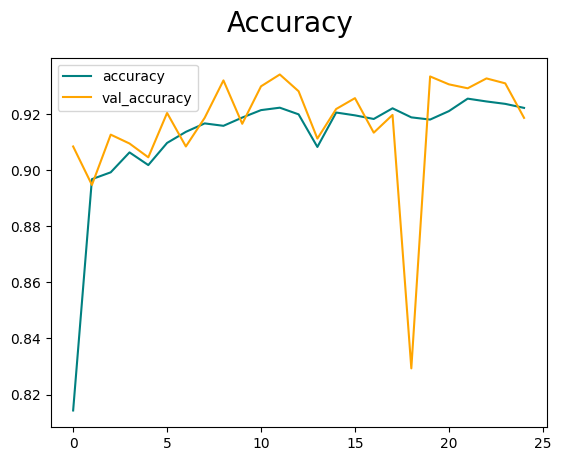

In [12]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()